# CMIP6

In [1]:
# Load libraries

import xarray as xr
import pathlib
from os import listdir
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
import cartopy.crs as ccrs
import cartopy as cart
import matplotlib

# Load data

In [2]:
vert_ds = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/vert_ds.nc')
vert_ds.load()

#cmip6 = xr.open_dataarray('/data/keeling/a/mailes2/a/lens_processed/CMIP6_TAS_17mod_10mem.nc')
#cmip6.load()

cmip6_ts = xr.open_dataarray('/data/keeling/a/mailes2/a/lens_processed/CMIP6_TS_17mod_10mem.nc')
cmip6_ts.load()

<xarray.DataArray 'ts' (name: 17, version: 10, time: 1980, lat: 88, lon: 179)>
array([[[[[253.00307373, 252.98826172, 253.03575846, ...,
           253.57400309, 253.49858805, 253.27084717],
          [255.07168376, 255.09144287, 254.91532389, ...,
           255.77235514, 255.54164632, 255.35515137],
          [256.54533529, 256.50243652, 256.05487874, ...,
           257.25218099, 256.86581624, 256.73163818],
          ...,
          [246.73263184, 247.0326709 , 247.4541097 , ...,
           243.79992432, 244.87587484, 245.74145508],
          [244.63420817, 244.7484375 , 244.925354  , ...,
           243.1075765 , 243.66886393, 244.10712891],
          [242.75464681, 242.93662842, 243.10618896, ...,
           241.95870117, 242.24241536, 242.37256104]],

         [[237.45596273, 237.36615967, 237.1881307 , ...,
           238.33289551, 238.08636068, 237.90163574],
          [240.13019613, 239.69975586, 239.33284505, ...,
           241.95293376, 241.43611654, 240.97316895],
          [242.4944165 , 241.9384668 , 241.3348999 , ...,
           244.81964925, 244.23859049, 243.64677734],
...
          [244.57594503, 245.21582879, 245.75739712, ...,
           242.46148249, 242.95631112, 243.46394492],
          [241.98316532, 242.25125571, 242.51428604, ...,
           240.91306636, 241.15431086, 241.45075421],
          [240.4111613 , 240.50751038, 240.59431966, ...,
           239.96656494, 240.07261658, 240.18417053]],

         [[240.22448451, 240.27114105, 239.94883474, ...,
           241.00924606, 240.60922368, 240.53746567],
          [243.37467049, 242.49402991, 242.30846914, ...,
           245.40009884, 244.65768348, 243.93493093],
          [245.67323591, 244.65454169, 243.87651571, ...,
           248.20345052, 248.14315118, 247.43540107],
          ...,
          [256.36865404, 256.72547887, 256.92655648, ...,
           252.37111138, 253.79774475, 254.93952467],
          [253.30463011, 253.68308292, 253.96316104, ...,
           250.70353021, 251.42320421, 252.19812385],
          [250.22950923, 250.46995468, 250.6662    , ...,
           248.97718531, 249.29771042, 249.61450017]]]]])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-31 1850-02-28 ... 2014-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'NorCPM1'
Dimensions without coordinates: version
Attributes:
    standard_name:  surface_temperature
    long_name:      Surface Temperature
    comment:        Temperature of the lower boundary of the atmosphere
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella

## Compute ensemble means

### TAS

In [4]:
cmip6_forced = cmip6.mean(dim='version')
cmip6_forced

<xarray.DataArray 'tas' (name: 17, time: 1980, lat: 88, lon: 179)>
array([[[[252.60072241, 252.56013794, 252.48984294, ..., 252.81011304,
          252.75044881, 252.69553027],
         [253.92368286, 253.76056763, 253.58527425, ..., 254.62893799,
          254.44076945, 254.26795898],
         [254.95799886, 254.75900269, 254.56227091, ..., 255.78860229,
          255.59710571, 255.36497583],
         ...,
         [241.10960075, 241.30713892, 241.50224976, ..., 240.15099976,
          240.51345133, 240.76334082],
         [239.8316097 , 239.92923218, 240.00853882, ..., 239.30468547,
          239.42918701, 239.56919312],
         [238.94501294, 238.98413477, 239.04908976, ..., 238.75580664,
          238.81193726, 238.84376758]],

        [[235.91740243, 235.80868481, 235.67527425, ..., 236.69732194,
          236.50598999, 236.31340747],
         [239.33324015, 239.04123535, 238.76451619, ..., 240.64161255,
          240.25384521, 239.93321777],
         [241.87452523, 241.54406885, 241.23254313, ..., 243.44696232,
          243.03619222, 242.65793994],
...
         [244.49556337, 244.84372252, 245.11261063, ..., 243.17404694,
          243.49484083, 243.81617388],
         [242.65172088, 242.7817018 , 242.90703888, ..., 242.11533858,
          242.24260457, 242.39044417],
         [241.68941966, 241.74270561, 241.79065412, ..., 241.43930433,
          241.50205294, 241.56525983]],

        [[243.42448138, 243.25824671, 243.11072718, ..., 244.18013987,
          243.96687266, 243.78961863],
         [246.69429731, 246.17442847, 245.69154341, ..., 248.53537385,
          248.08459646, 247.61126323],
         [248.88128704, 248.26151549, 247.77925597, ..., 251.4605603 ,
          251.28332113, 250.51821167],
         ...,
         [244.20698501, 244.5664949 , 244.83720152, ..., 242.43816425,
          242.93282377, 243.38968331],
         [242.12435814, 242.3361583 , 242.52660044, ..., 241.13995279,
          241.37887315, 241.65479461],
         [240.81537277, 240.92505918, 241.02196032, ..., 240.30887594,
          240.4350469 , 240.56152629]]]])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-31 1850-02-28 ... 2014-12-31
    height   float64 2.0
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'NorCPM1'

In [5]:
cmip6_forced.to_netcdf('/data/keeling/a/mailes2/a/lens_processed/CMIP6_TAS_forced.nc')

In [4]:
cmip6_forced = xr.open_dataarray('/data/keeling/a/mailes2/a/lens_processed/CMIP6_TAS_forced.nc')

### TS

In [3]:
cmip6_ts_forced = cmip6_ts.mean(dim='version')
cmip6_ts_forced

<xarray.DataArray 'ts' (name: 17, time: 1980, lat: 88, lon: 179)>
array([[[[252.93326359, 252.90495923, 252.80650798, ..., 253.13923722,
          253.06408895, 253.01630444],
         [254.15332804, 254.00489502, 253.80661011, ..., 254.81757975,
          254.6388855 , 254.48421021],
         [255.19233488, 254.99065063, 254.74355184, ..., 256.09888647,
          255.92413208, 255.69287744],
         ...,
         [240.24013403, 240.41900049, 240.56945475, ..., 239.37192082,
          239.68867716, 239.89691772],
         [238.89970215, 238.97022949, 239.02863159, ..., 238.46505819,
          238.58042196, 238.65355225],
         [237.96138029, 237.99948389, 238.04493896, ..., 237.84892253,
          237.88185628, 237.886927  ]],

        [[235.00957853, 234.90165527, 234.76960205, ..., 235.77287671,
          235.58107747, 235.40388843],
         [238.21958008, 237.92688232, 237.64275513, ..., 239.52232463,
          239.13252767, 238.81321899],
         [240.73312174, 240.38709888, 240.04714315, ..., 242.27521997,
          241.90663493, 241.54754639],
...
         [243.66384878, 244.00824577, 244.27320993, ..., 242.28782835,
          242.63364961, 242.97783968],
         [241.74909776, 241.88676658, 242.01306042, ..., 241.18296474,
          241.31160647, 241.46796288],
         [240.76856356, 240.81903994, 240.86411654, ..., 240.51214213,
          240.57545166, 240.64138753]],

        [[242.4835041 , 242.28104365, 242.09757818, ..., 243.35647598,
          243.11698837, 242.91836929],
         [246.08997558, 245.45429634, 244.8071042 , ..., 248.10194684,
          247.6193359 , 247.09207247],
         [248.1952831 , 247.44631005, 246.88653887, ..., 250.86446855,
          251.04786479, 250.24355191],
         ...,
         [243.33835937, 243.68369776, 243.93520156, ..., 241.57934207,
          242.06947628, 242.53547932],
         [241.20464893, 241.41959518, 241.60680991, ..., 240.22217249,
          240.44758966, 240.72438145],
         [239.9006017 , 240.0058637 , 240.10053533, ..., 239.39759827,
          239.51933899, 239.64630025]]]])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-31 1850-02-28 ... 2014-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'NorCPM1'

In [4]:
cmip6_ts_forced.to_netcdf('/data/keeling/a/mailes2/a/lens_processed/CMIP6_TS_forced.nc')

## Smooth to decadal time scales

### TAS

In [5]:
cmip6_smoothed = cmip6.rolling(time=120, center=True).mean('time')
cmip6_smoothed

<xarray.DataArray 'tas' (name: 17, version: 10, time: 1980, lat: 88, lon: 179)>
array([[[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
...
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]]]])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-31 1850-02-28 ... 2014-12-31
    height   float64 2.0
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'NorCPM1'
Dimensions without coordinates: version
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2022-08-19T06:36:14Z altered by CMOR: Treated scalar dime...

In [6]:
cmip6_forced_smoothed = cmip6_forced.rolling(time=120, center=True).mean('time')
cmip6_forced_smoothed

<xarray.DataArray 'tas' (name: 17, time: 1980, lat: 88, lon: 179)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-31 1850-02-28 ... 2014-12-31
    height   float64 ...
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'NorCPM1'

### TS

In [5]:
cmip6_ts_smoothed = cmip6_ts.rolling(time=120, center=True).mean('time')
cmip6_ts_smoothed

<xarray.DataArray 'ts' (name: 17, version: 10, time: 1980, lat: 88, lon: 179)>
array([[[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
...
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]]]])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-31 1850-02-28 ... 2014-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'NorCPM1'
Dimensions without coordinates: version
Attributes:
    standard_name:  surface_temperature
    long_name:      Surface Temperature
    comment:        Temperature of the lower boundary of the atmosphere
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella

In [6]:
cmip6_ts_forced_smoothed = cmip6_ts_forced.rolling(time=120, center=True).mean('time')
cmip6_ts_forced_smoothed

<xarray.DataArray 'ts' (name: 17, time: 1980, lat: 88, lon: 179)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-31 1850-02-28 ... 2014-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'NorCPM1'

## Correlate local temperature

In [7]:
cmip6_local_corr = xr.DataArray(np.zeros((17,10,88,179)), dims=['name','version','lat','lon'])
i = 0
for model in cmip6_smoothed['name']:
    print(model)
    cmip6_local_corr[i,:,:,:] = xr.corr(cmip6_smoothed.sel(name=model), cmip6_forced_smoothed.sel(name=model), dim='time')
    i += 1
cmip6_local_corr

<xarray.DataArray 'name' ()>
array('ACCESS-CM2', dtype='<U10')
Coordinates:
    height   float64 2.0
    name     <U10 'ACCESS-CM2'
<xarray.DataArray 'name' ()>
array('ACCESS-ESM1-5', dtype='<U13')
Coordinates:
    height   float64 2.0
    name     <U13 'ACCESS-ESM1-5'
<xarray.DataArray 'name' ()>
array('CNRM-CM6-1', dtype='<U10')
Coordinates:
    height   float64 2.0
    name     <U10 'CNRM-CM6-1'
<xarray.DataArray 'name' ()>
array('CNRM-ESM2-1', dtype='<U11')
Coordinates:
    height   float64 2.0
    name     <U11 'CNRM-ESM2-1'
<xarray.DataArray 'name' ()>
array('CanESM5-1', dtype='<U9')
Coordinates:
    height   float64 2.0
    name     <U9 'CanESM5-1'
<xarray.DataArray 'name' ()>
array('CanESM5', dtype='<U7')
Coordinates:
    height   float64 2.0
    name     <U7 'CanESM5'
<xarray.DataArray 'name' ()>
array('E3SM-2-0', dtype='<U8')
Coordinates:
    height   float64 2.0
    name     <U8 'E3SM-2-0'
<xarray.DataArray 'name' ()>
array('GISS-E2-1-G', dtype='<U11')
Coordinates:
    heigh

<xarray.DataArray (name: 17, version: 10, lat: 88, lon: 179)>
array([[[[0.81848591, 0.81722939, 0.81638061, ..., 0.82638128,
          0.82469422, 0.82251846],
         [0.76723936, 0.76652528, 0.76561298, ..., 0.77409931,
          0.77185145, 0.76999042],
         [0.76566846, 0.76717455, 0.76868611, ..., 0.78223017,
          0.77957517, 0.77261015],
         ...,
         [0.75939511, 0.75180379, 0.74598942, ..., 0.79790207,
          0.78473238, 0.77508291],
         [0.80454501, 0.80068842, 0.79712882, ..., 0.82263065,
          0.81756538, 0.81257982],
         [0.83173626, 0.83027485, 0.82928974, ..., 0.83668858,
          0.83489622, 0.83312698]],

        [[0.86235249, 0.862736  , 0.86235   , ..., 0.86354559,
          0.86361506, 0.86287154],
         [0.80666153, 0.80428685, 0.80232367, ..., 0.80941952,
          0.80819507, 0.80741531],
         [0.79830307, 0.79343213, 0.78743102, ..., 0.80918454,
          0.80677025, 0.80454206],
...
         [0.7584157 , 0.74806448, 0.74035286, ..., 0.80237859,
          0.79185757, 0.78110358],
         [0.79571603, 0.79138565, 0.78692401, ..., 0.81204379,
          0.80852172, 0.80410642],
         [0.81104197, 0.80959486, 0.80833885, ..., 0.81735183,
          0.81570891, 0.81416532]],

        [[0.84384149, 0.82968266, 0.84339305, ..., 0.87625271,
          0.84525822, 0.82686467],
         [0.82863335, 0.8280589 , 0.83335814, ..., 0.8370213 ,
          0.82511057, 0.81850294],
         [0.78996652, 0.77218681, 0.7949026 , ..., 0.82119074,
          0.83248698, 0.80368111],
         ...,
         [0.79319331, 0.78074616, 0.7708123 , ..., 0.84262113,
          0.82962181, 0.81832299],
         [0.8204338 , 0.81384458, 0.80776914, ..., 0.85205444,
          0.84390487, 0.83536749],
         [0.83782307, 0.83351606, 0.83030417, ..., 0.85581336,
          0.85124678, 0.8470021 ]]]])
Dimensions without coordinates: name, version, lat, lon

In [8]:
cmip6_local_corr_mean = cmip6_local_corr.mean(dim='version')
cmip6_local_corr_mean

<xarray.DataArray (name: 17, lat: 88, lon: 179)>
array([[[0.79874691, 0.79777855, 0.79651396, ..., 0.80407204,
         0.80241862, 0.80092845],
        [0.765187  , 0.76416591, 0.76301983, ..., 0.76463059,
         0.7643998 , 0.76452855],
        [0.75449885, 0.75472047, 0.75428177, ..., 0.75427686,
         0.75492036, 0.75435127],
        ...,
        [0.71231306, 0.70190175, 0.6915039 , ..., 0.76207251,
         0.74714961, 0.73488663],
        [0.76015761, 0.75437602, 0.74890314, ..., 0.78919551,
         0.78136866, 0.77378442],
        [0.78501005, 0.78216073, 0.77981098, ..., 0.79682167,
         0.79352828, 0.79080807]],

       [[0.77679937, 0.77762911, 0.77837974, ..., 0.77356667,
         0.77429687, 0.77509041],
        [0.7691579 , 0.76933681, 0.76949191, ..., 0.76856989,
         0.76879769, 0.76891749],
        [0.74190494, 0.74226068, 0.74231072, ..., 0.73985199,
         0.74014593, 0.74070925],
...
        [0.83910234, 0.83614771, 0.83341812, ..., 0.85431434,
         0.85002802, 0.84604577],
        [0.85021578, 0.84825447, 0.84638761, ..., 0.8590449 ,
         0.85672456, 0.85447617],
        [0.85695208, 0.85582526, 0.85478477, ..., 0.86151952,
         0.86037161, 0.85924081]],

       [[0.84388014, 0.83295993, 0.83597054, ..., 0.84413121,
         0.84692692, 0.84270063],
        [0.81504875, 0.80516199, 0.79362561, ..., 0.83320927,
         0.82741044, 0.82174334],
        [0.81306379, 0.7987205 , 0.79193897, ..., 0.83859044,
         0.83630999, 0.82881433],
        ...,
        [0.69497035, 0.68074839, 0.6698542 , ..., 0.75714023,
         0.74043034, 0.72526225],
        [0.75585502, 0.74863577, 0.74171796, ..., 0.7873447 ,
         0.77963059, 0.77099392],
        [0.78712244, 0.78378599, 0.78100248, ..., 0.80087447,
         0.79743193, 0.79416632]]])
Dimensions without coordinates: name, lat, lon

In [9]:
cmip6_local_corr_mean.coords['name'] = cmip6_smoothed['name'].values
cmip6_local_corr_mean.coords['lat'] = cmip6_smoothed['lat'].values
cmip6_local_corr_mean.coords['lon'] = cmip6_smoothed['lon'].values
cmip6_local_corr_mean

<xarray.DataArray (name: 17, lat: 88, lon: 179)>
array([[[0.79874691, 0.79777855, 0.79651396, ..., 0.80407204,
         0.80241862, 0.80092845],
        [0.765187  , 0.76416591, 0.76301983, ..., 0.76463059,
         0.7643998 , 0.76452855],
        [0.75449885, 0.75472047, 0.75428177, ..., 0.75427686,
         0.75492036, 0.75435127],
        ...,
        [0.71231306, 0.70190175, 0.6915039 , ..., 0.76207251,
         0.74714961, 0.73488663],
        [0.76015761, 0.75437602, 0.74890314, ..., 0.78919551,
         0.78136866, 0.77378442],
        [0.78501005, 0.78216073, 0.77981098, ..., 0.79682167,
         0.79352828, 0.79080807]],

       [[0.77679937, 0.77762911, 0.77837974, ..., 0.77356667,
         0.77429687, 0.77509041],
        [0.7691579 , 0.76933681, 0.76949191, ..., 0.76856989,
         0.76879769, 0.76891749],
        [0.74190494, 0.74226068, 0.74231072, ..., 0.73985199,
         0.74014593, 0.74070925],
...
        [0.83910234, 0.83614771, 0.83341812, ..., 0.85431434,
         0.85002802, 0.84604577],
        [0.85021578, 0.84825447, 0.84638761, ..., 0.8590449 ,
         0.85672456, 0.85447617],
        [0.85695208, 0.85582526, 0.85478477, ..., 0.86151952,
         0.86037161, 0.85924081]],

       [[0.84388014, 0.83295993, 0.83597054, ..., 0.84413121,
         0.84692692, 0.84270063],
        [0.81504875, 0.80516199, 0.79362561, ..., 0.83320927,
         0.82741044, 0.82174334],
        [0.81306379, 0.7987205 , 0.79193897, ..., 0.83859044,
         0.83630999, 0.82881433],
        ...,
        [0.69497035, 0.68074839, 0.6698542 , ..., 0.75714023,
         0.74043034, 0.72526225],
        [0.75585502, 0.74863577, 0.74171796, ..., 0.7873447 ,
         0.77963059, 0.77099392],
        [0.78712244, 0.78378599, 0.78100248, ..., 0.80087447,
         0.79743193, 0.79416632]]])
Coordinates:
  * name     (name) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'NorCPM1'
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

Text(0.5, 1.01, 'CMIP6 TAS Correlation - Local temperature')

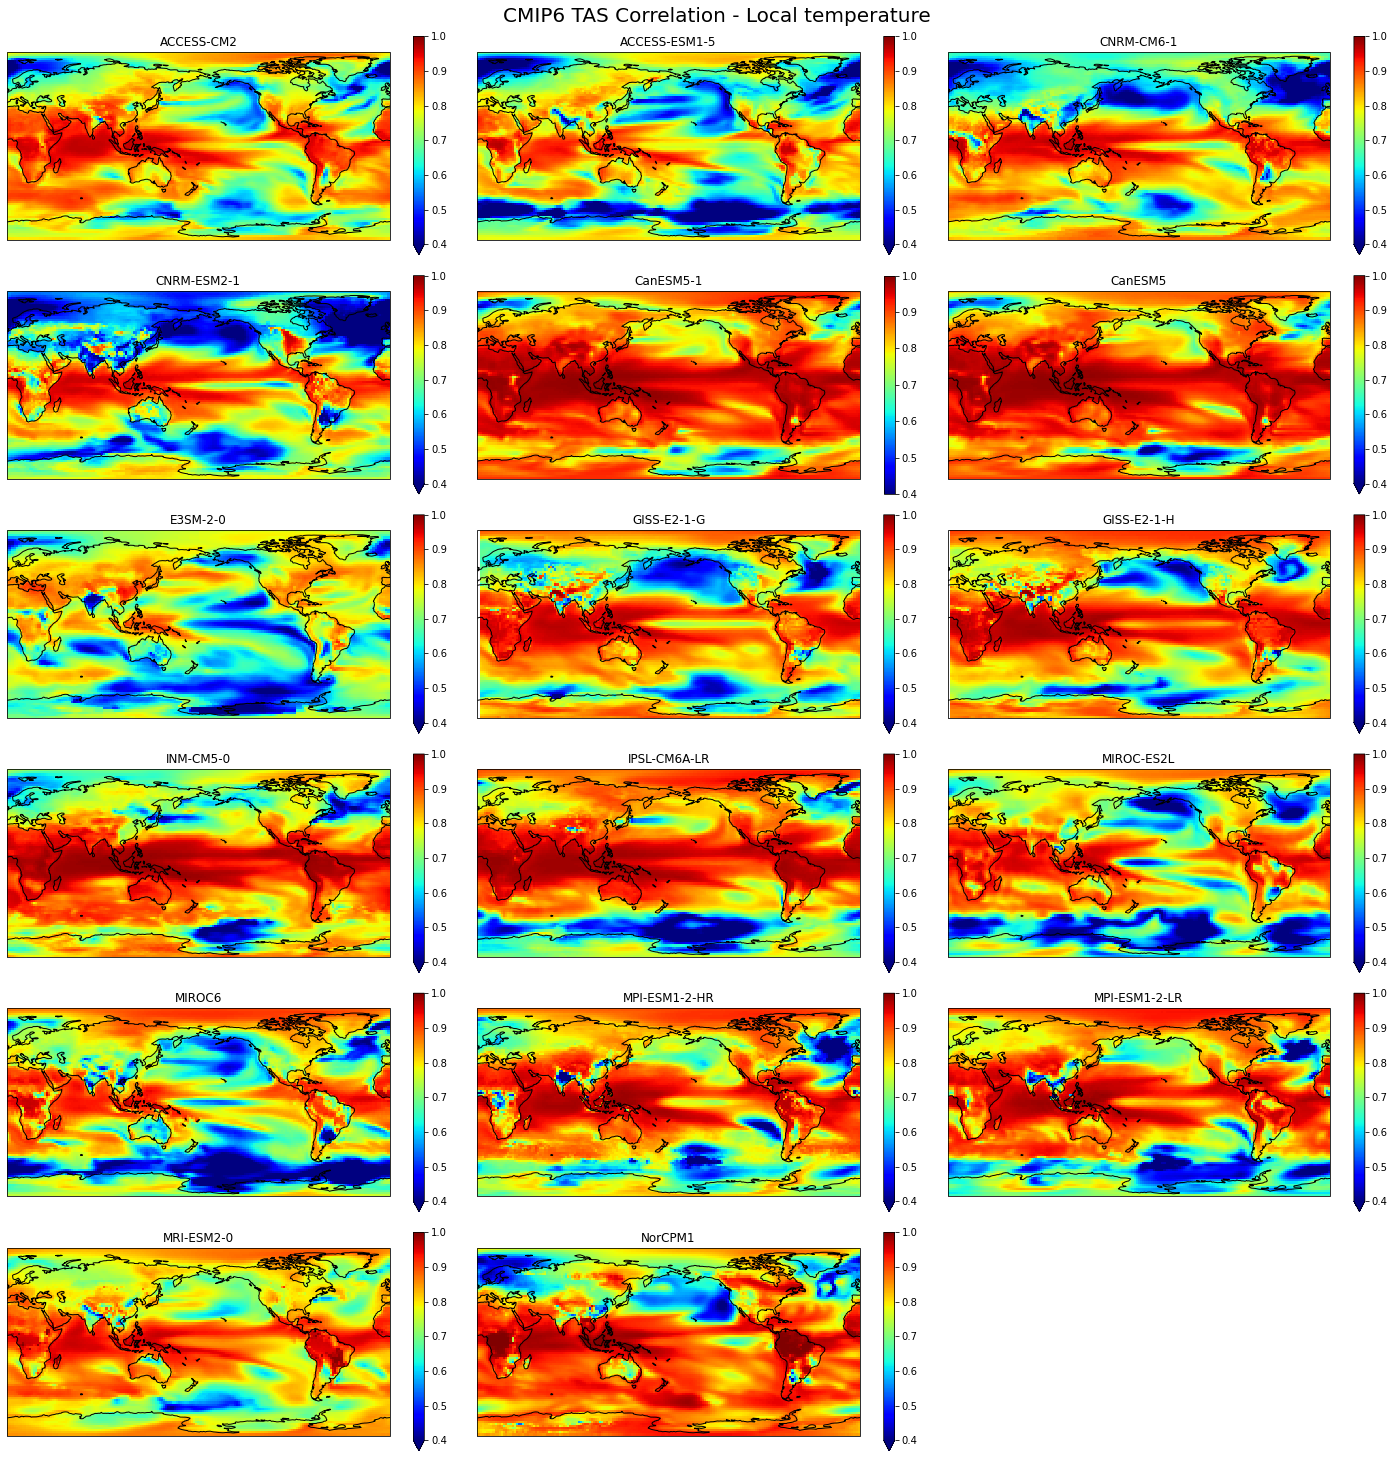

In [23]:
fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.1)

i = 1

for model in cmip6_local_corr_mean['name'].values:
    ax = fig.add_subplot(6,3,i, projection=ccrs.PlateCarree(central_longitude=180))
    cmip6_local_corr_mean.sel(name=model).plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0.4, vmax=1, cmap='jet')
    ax.coastlines(color='black', linewidth=1)
    plt.title(model)
    i += 1
plt.tight_layout()
plt.suptitle('CMIP6 TAS Correlation - Local temperature', fontsize=20, y=1.01)

Text(0.5, 1.01, 'CMIP6 TAS Correlation - Local temperature')

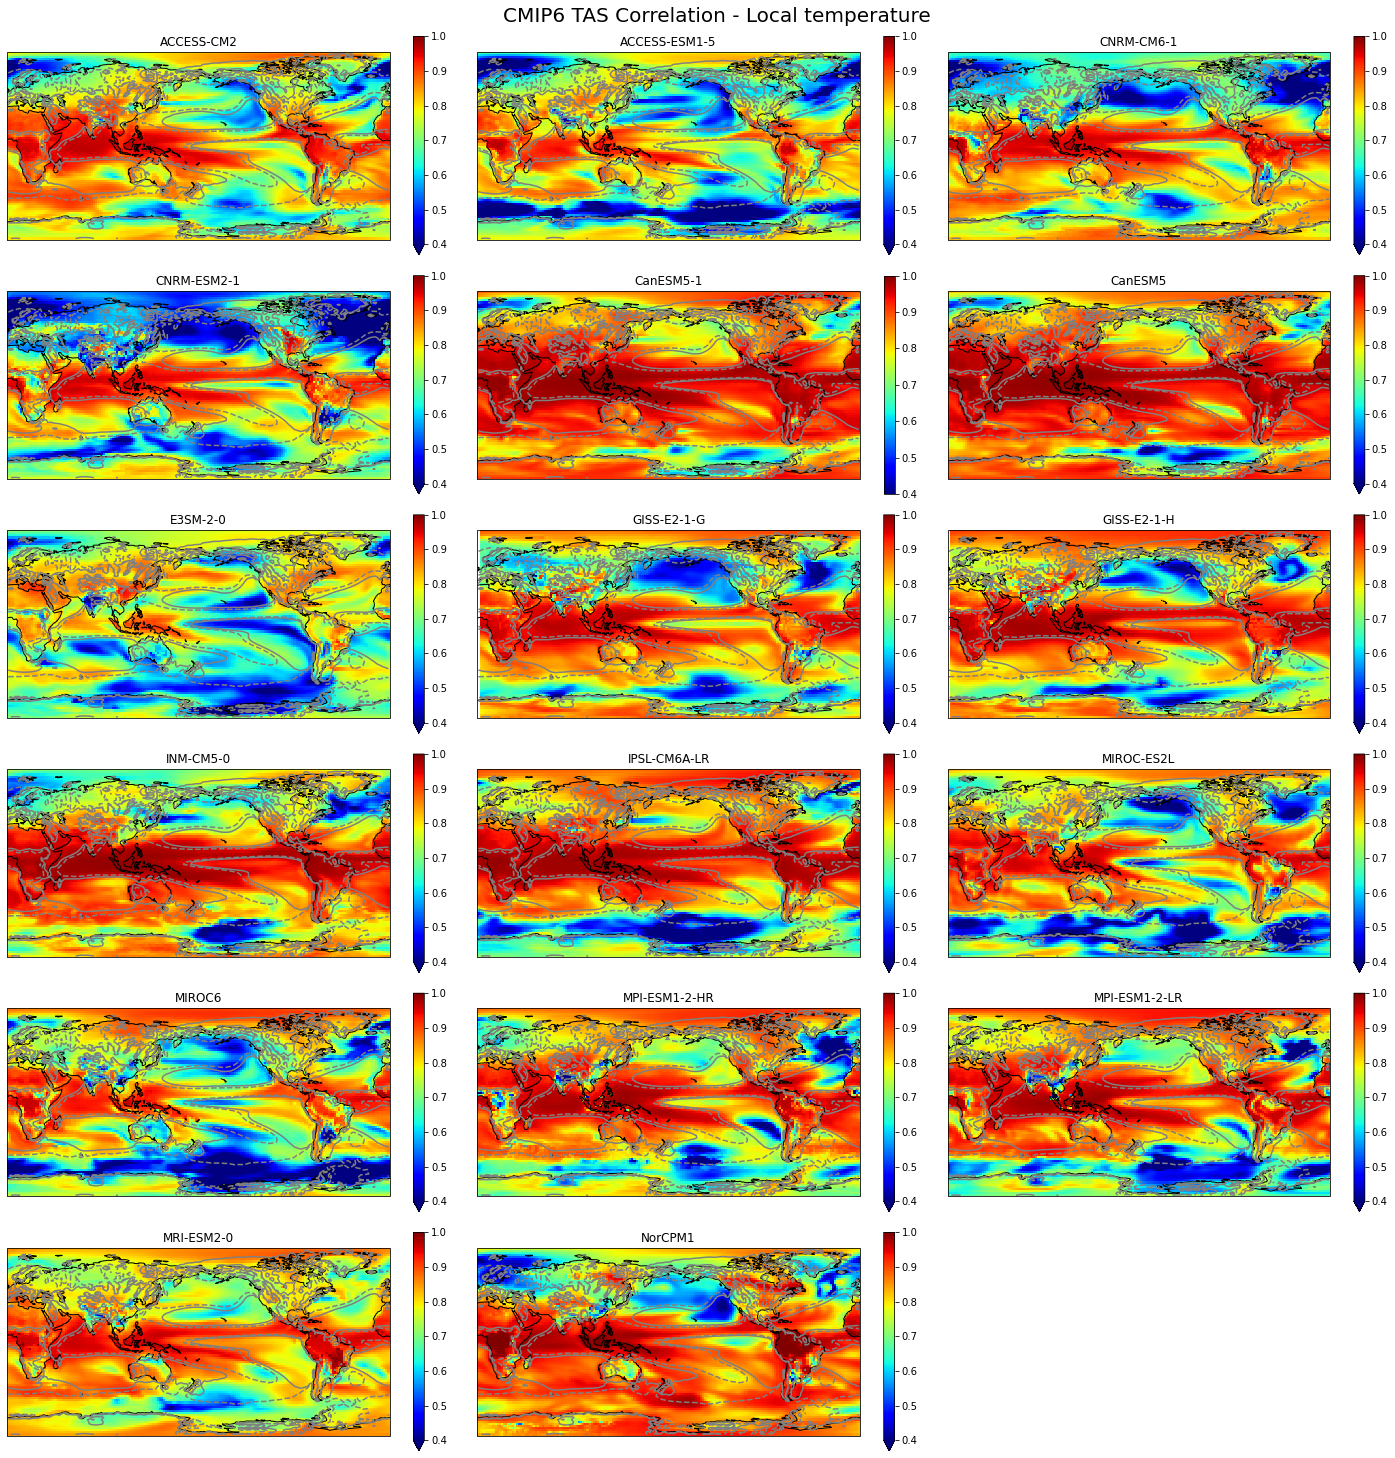

In [24]:
fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.1)

i = 1

for model in cmip6_local_corr_mean['name'].values:
    ax = fig.add_subplot(6,3,i, projection=ccrs.PlateCarree(central_longitude=180))
    cmip6_local_corr_mean.sel(name=model).plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0.4, vmax=1, cmap='jet')
    vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
    ax.coastlines(color='black', linewidth=1)
    plt.title(model)
    i += 1
plt.tight_layout()
plt.suptitle('CMIP6 TAS Correlation - Local temperature', fontsize=20, y=1.01)

Text(0.5, 1.0, 'CMIP6 TAS Correlation - Local temperature (N=17)')

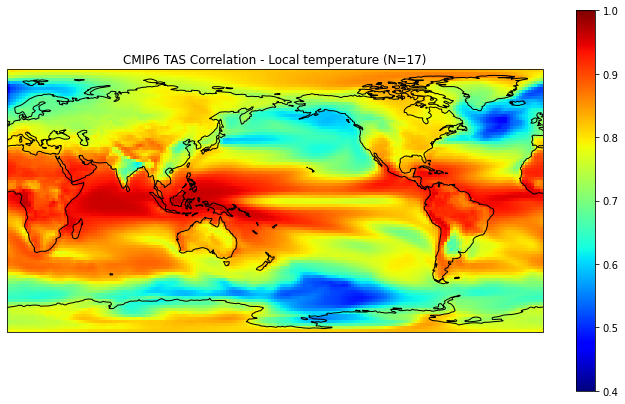

In [27]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cmip6_local_corr_mean.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0.4, vmax=1, cmap='jet')
ax.coastlines(color='black', linewidth=1)
#vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('CMIP6 TAS Correlation - Local temperature (N=17)')

Text(0.5, 1.0, 'CMIP6 TAS Correlation - Local temperature (N=17)')

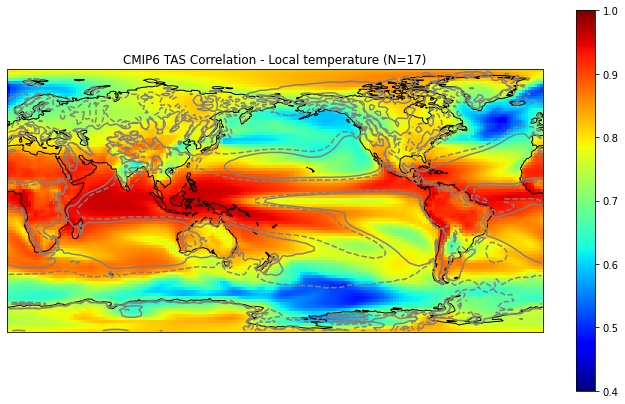

In [28]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cmip6_local_corr_mean.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0.4, vmax=1, cmap='jet')
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('CMIP6 TAS Correlation - Local temperature (N=17)')

## Correlate global temperature

### TAS

In [10]:
cmip6_global_corr = xr.DataArray(np.zeros((17,10,88,179)), dims=['name','version','lat','lon'])
i = 0
for model in cmip6_smoothed['name']:
    print(model)
    cmip6_global_corr[i,:,:,:] = xr.corr(cmip6_smoothed.sel(name=model), 
                                        cmip6_forced_smoothed.sel(name=model).mean('lat').mean('lon'), dim='time')
    i += 1
cmip6_global_corr

<xarray.DataArray 'name' ()>
array('ACCESS-CM2', dtype='<U10')
Coordinates:
    height   float64 2.0
    name     <U10 'ACCESS-CM2'
<xarray.DataArray 'name' ()>
array('ACCESS-ESM1-5', dtype='<U13')
Coordinates:
    height   float64 2.0
    name     <U13 'ACCESS-ESM1-5'
<xarray.DataArray 'name' ()>
array('CNRM-CM6-1', dtype='<U10')
Coordinates:
    height   float64 2.0
    name     <U10 'CNRM-CM6-1'
<xarray.DataArray 'name' ()>
array('CNRM-ESM2-1', dtype='<U11')
Coordinates:
    height   float64 2.0
    name     <U11 'CNRM-ESM2-1'
<xarray.DataArray 'name' ()>
array('CanESM5-1', dtype='<U9')
Coordinates:
    height   float64 2.0
    name     <U9 'CanESM5-1'
<xarray.DataArray 'name' ()>
array('CanESM5', dtype='<U7')
Coordinates:
    height   float64 2.0
    name     <U7 'CanESM5'
<xarray.DataArray 'name' ()>
array('E3SM-2-0', dtype='<U8')
Coordinates:
    height   float64 2.0
    name     <U8 'E3SM-2-0'
<xarray.DataArray 'name' ()>
array('GISS-E2-1-G', dtype='<U11')
Coordinates:
    heigh

<xarray.DataArray (name: 17, version: 10, lat: 88, lon: 179)>
array([[[[0.81039339, 0.8118473 , 0.8115785 , ..., 0.81247318,
          0.81157798, 0.81232713],
         [0.74425962, 0.74319285, 0.74136651, ..., 0.74530701,
          0.74508565, 0.74489838],
         [0.72419003, 0.72316927, 0.72056828, ..., 0.73221991,
          0.73145859, 0.7276724 ],
         ...,
         [0.75055372, 0.74478954, 0.7388934 , ..., 0.78026737,
          0.76944662, 0.76252087],
         [0.79534346, 0.79285441, 0.79026363, ..., 0.80291475,
          0.80090454, 0.7993785 ],
         [0.80507268, 0.80350493, 0.80307855, ..., 0.80945461,
          0.8080816 , 0.8065214 ]],

        [[0.73849952, 0.73779715, 0.7360005 , ..., 0.74642833,
          0.74488428, 0.74324662],
         [0.69439687, 0.69282697, 0.69132171, ..., 0.69472336,
          0.69332823, 0.69438058],
         [0.72471905, 0.72587851, 0.72606088, ..., 0.72260485,
          0.72325458, 0.72370213],
...
         [0.60096433, 0.58189517, 0.56716808, ..., 0.68591048,
          0.66272579, 0.64165611],
         [0.68675595, 0.67872968, 0.67071897, ..., 0.72162544,
          0.71317384, 0.70342754],
         [0.71756716, 0.71454081, 0.71198025, ..., 0.73173445,
          0.72814505, 0.72461018]],

        [[0.86875556, 0.86269731, 0.86666607, ..., 0.86870708,
          0.85960261, 0.85388318],
         [0.8322022 , 0.84132463, 0.84026547, ..., 0.81692969,
          0.81241355, 0.81168416],
         [0.76176511, 0.78055813, 0.78773678, ..., 0.73776793,
          0.75882041, 0.7399983 ],
         ...,
         [0.5585224 , 0.52750619, 0.50279066, ..., 0.67655772,
          0.64812178, 0.62070189],
         [0.63529258, 0.6225543 , 0.61005985, ..., 0.68559265,
          0.67425133, 0.66071604],
         [0.66757622, 0.66236257, 0.65822893, ..., 0.68714202,
          0.68247522, 0.67794161]]]])
Dimensions without coordinates: name, version, lat, lon

In [11]:
cmip6_global_corr_mean = cmip6_global_corr.mean('version')
cmip6_global_corr_mean

<xarray.DataArray (name: 17, lat: 88, lon: 179)>
array([[[0.68749299, 0.68611812, 0.68417593, ..., 0.69597507,
         0.69366564, 0.69160508],
        [0.63145476, 0.62928719, 0.62734751, ..., 0.63556729,
         0.63437052, 0.63337001],
        [0.62707777, 0.62586118, 0.62390961, ..., 0.63282089,
         0.63163445, 0.62971224],
        ...,
        [0.69302484, 0.68218421, 0.67147628, ..., 0.7401779 ,
         0.72717177, 0.71568536],
        [0.74357409, 0.73818757, 0.73294795, ..., 0.76998885,
         0.76313213, 0.75625515],
        [0.7675254 , 0.76473266, 0.76258207, ..., 0.77835288,
         0.77544465, 0.77299301]],

       [[0.71304599, 0.71447941, 0.7158385 , ..., 0.7073914 ,
         0.7087314 , 0.71012298],
        [0.69241008, 0.69356149, 0.6948792 , ..., 0.68917402,
         0.6899278 , 0.6906227 ],
        [0.64775846, 0.64980196, 0.65197268, ..., 0.64174684,
         0.64282226, 0.64427917],
...
        [0.82888839, 0.82571781, 0.82270697, ..., 0.84400492,
         0.8398844 , 0.83599902],
        [0.83719164, 0.83494197, 0.83278434, ..., 0.84690397,
         0.84443659, 0.84198478],
        [0.84124283, 0.83995551, 0.8387439 , ..., 0.84638207,
         0.84510017, 0.84383255]],

       [[0.75084121, 0.74239773, 0.75168863, ..., 0.75730748,
         0.75365889, 0.74950643],
        [0.73686065, 0.73051598, 0.72444564, ..., 0.74415193,
         0.7391378 , 0.73268803],
        [0.71534163, 0.70804948, 0.6969802 , ..., 0.73696349,
         0.72763269, 0.72248317],
        ...,
        [0.48943526, 0.47140292, 0.45756121, ..., 0.57067989,
         0.54871378, 0.5287858 ],
        [0.56560603, 0.55817618, 0.55102511, ..., 0.59982549,
         0.59126601, 0.58170322],
        [0.59164762, 0.58883622, 0.58647081, ..., 0.60382057,
         0.60073641, 0.59779905]]])
Dimensions without coordinates: name, lat, lon

In [12]:
cmip6_global_corr_mean.coords['name'] = cmip6_smoothed['name'].values
cmip6_global_corr_mean.coords['lat'] = cmip6_smoothed['lat'].values
cmip6_global_corr_mean.coords['lon'] = cmip6_smoothed['lon'].values
cmip6_global_corr_mean

<xarray.DataArray (name: 17, lat: 88, lon: 179)>
array([[[0.68749299, 0.68611812, 0.68417593, ..., 0.69597507,
         0.69366564, 0.69160508],
        [0.63145476, 0.62928719, 0.62734751, ..., 0.63556729,
         0.63437052, 0.63337001],
        [0.62707777, 0.62586118, 0.62390961, ..., 0.63282089,
         0.63163445, 0.62971224],
        ...,
        [0.69302484, 0.68218421, 0.67147628, ..., 0.7401779 ,
         0.72717177, 0.71568536],
        [0.74357409, 0.73818757, 0.73294795, ..., 0.76998885,
         0.76313213, 0.75625515],
        [0.7675254 , 0.76473266, 0.76258207, ..., 0.77835288,
         0.77544465, 0.77299301]],

       [[0.71304599, 0.71447941, 0.7158385 , ..., 0.7073914 ,
         0.7087314 , 0.71012298],
        [0.69241008, 0.69356149, 0.6948792 , ..., 0.68917402,
         0.6899278 , 0.6906227 ],
        [0.64775846, 0.64980196, 0.65197268, ..., 0.64174684,
         0.64282226, 0.64427917],
...
        [0.82888839, 0.82571781, 0.82270697, ..., 0.84400492,
         0.8398844 , 0.83599902],
        [0.83719164, 0.83494197, 0.83278434, ..., 0.84690397,
         0.84443659, 0.84198478],
        [0.84124283, 0.83995551, 0.8387439 , ..., 0.84638207,
         0.84510017, 0.84383255]],

       [[0.75084121, 0.74239773, 0.75168863, ..., 0.75730748,
         0.75365889, 0.74950643],
        [0.73686065, 0.73051598, 0.72444564, ..., 0.74415193,
         0.7391378 , 0.73268803],
        [0.71534163, 0.70804948, 0.6969802 , ..., 0.73696349,
         0.72763269, 0.72248317],
        ...,
        [0.48943526, 0.47140292, 0.45756121, ..., 0.57067989,
         0.54871378, 0.5287858 ],
        [0.56560603, 0.55817618, 0.55102511, ..., 0.59982549,
         0.59126601, 0.58170322],
        [0.59164762, 0.58883622, 0.58647081, ..., 0.60382057,
         0.60073641, 0.59779905]]])
Coordinates:
  * name     (name) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'NorCPM1'
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

Text(0.5, 1.01, 'CMIP6 TAS Correlation - Global temperature')

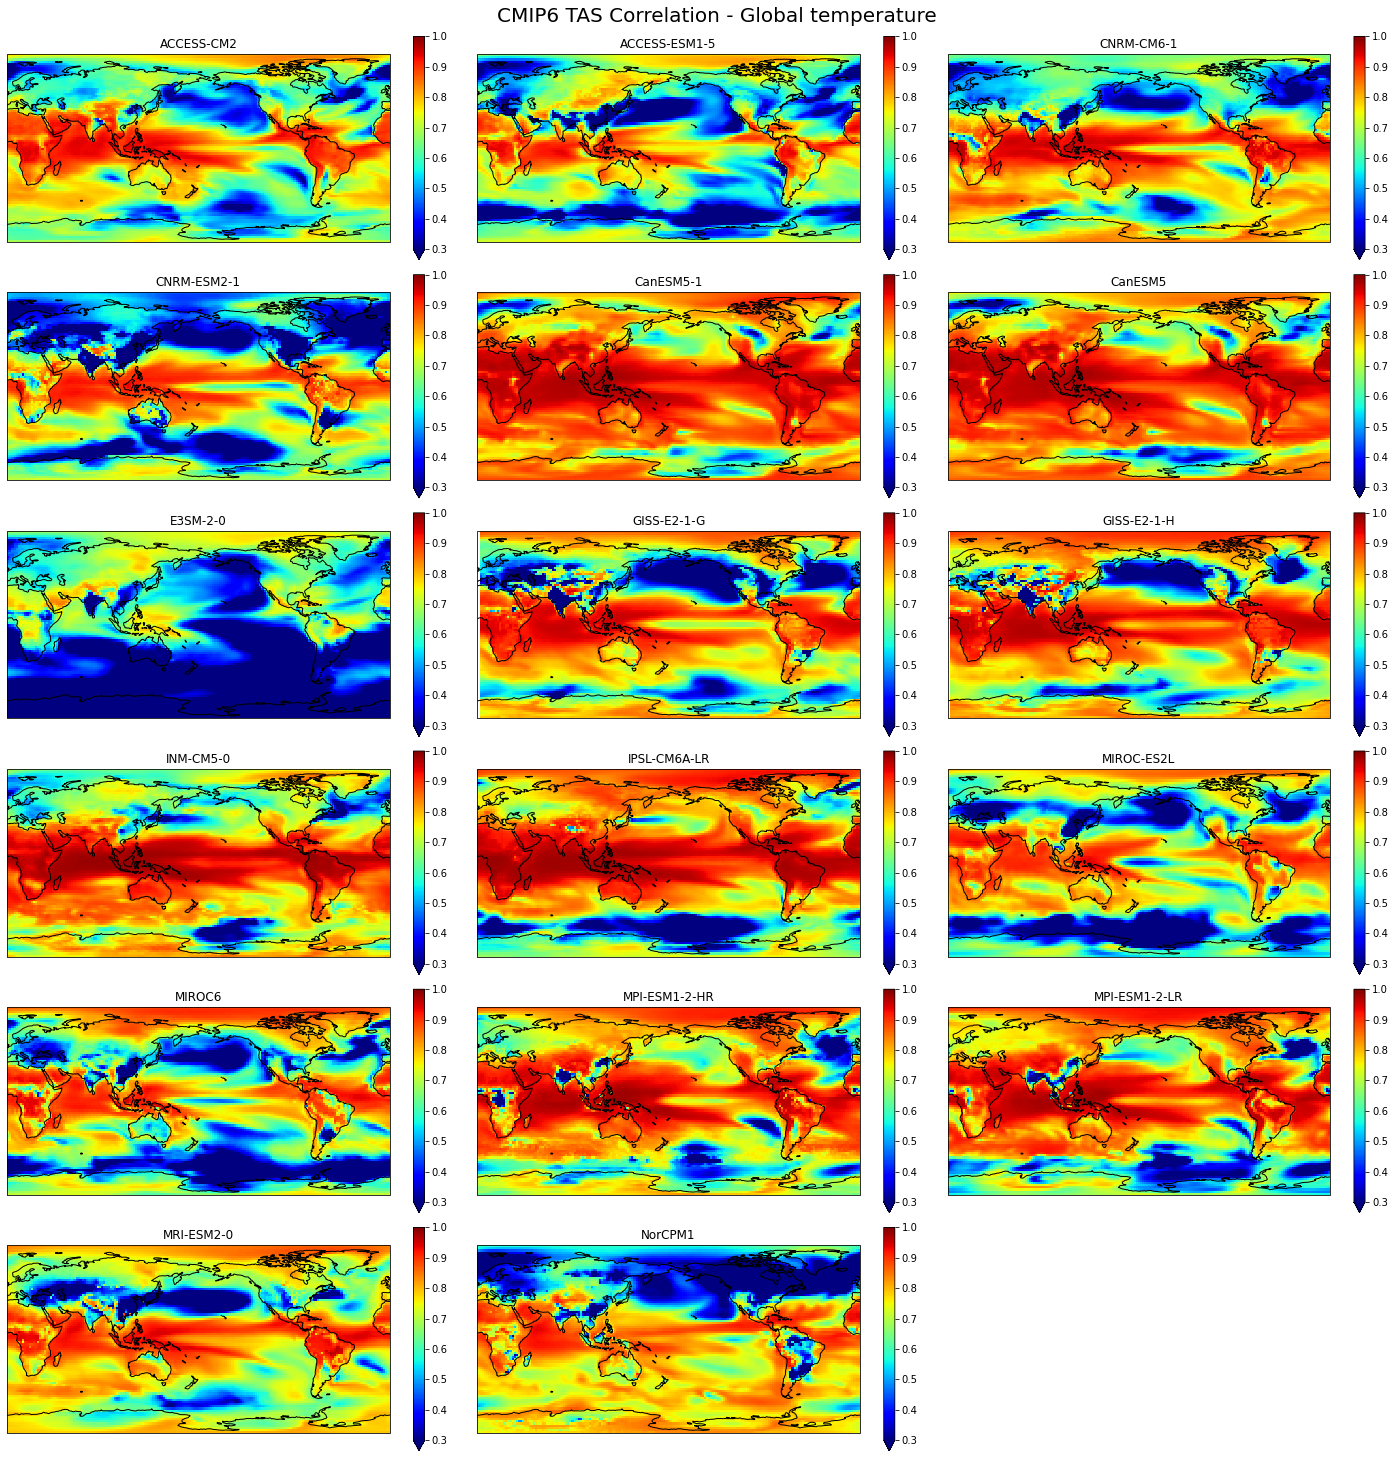

In [34]:
fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.1)

i = 1

for model in cmip6_global_corr_mean['name'].values:
    ax = fig.add_subplot(6,3,i, projection=ccrs.PlateCarree(central_longitude=180))
    cmip6_global_corr_mean.sel(name=model).plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0.3, vmax=1, cmap='jet')
    ax.coastlines(color='black', linewidth=1)
    plt.title(model)
    i += 1
plt.tight_layout()
plt.suptitle('CMIP6 TAS Correlation - Global temperature', fontsize=20, y=1.01)

Text(0.5, 1.01, 'CMIP6 TAS Correlation - Global temperature')

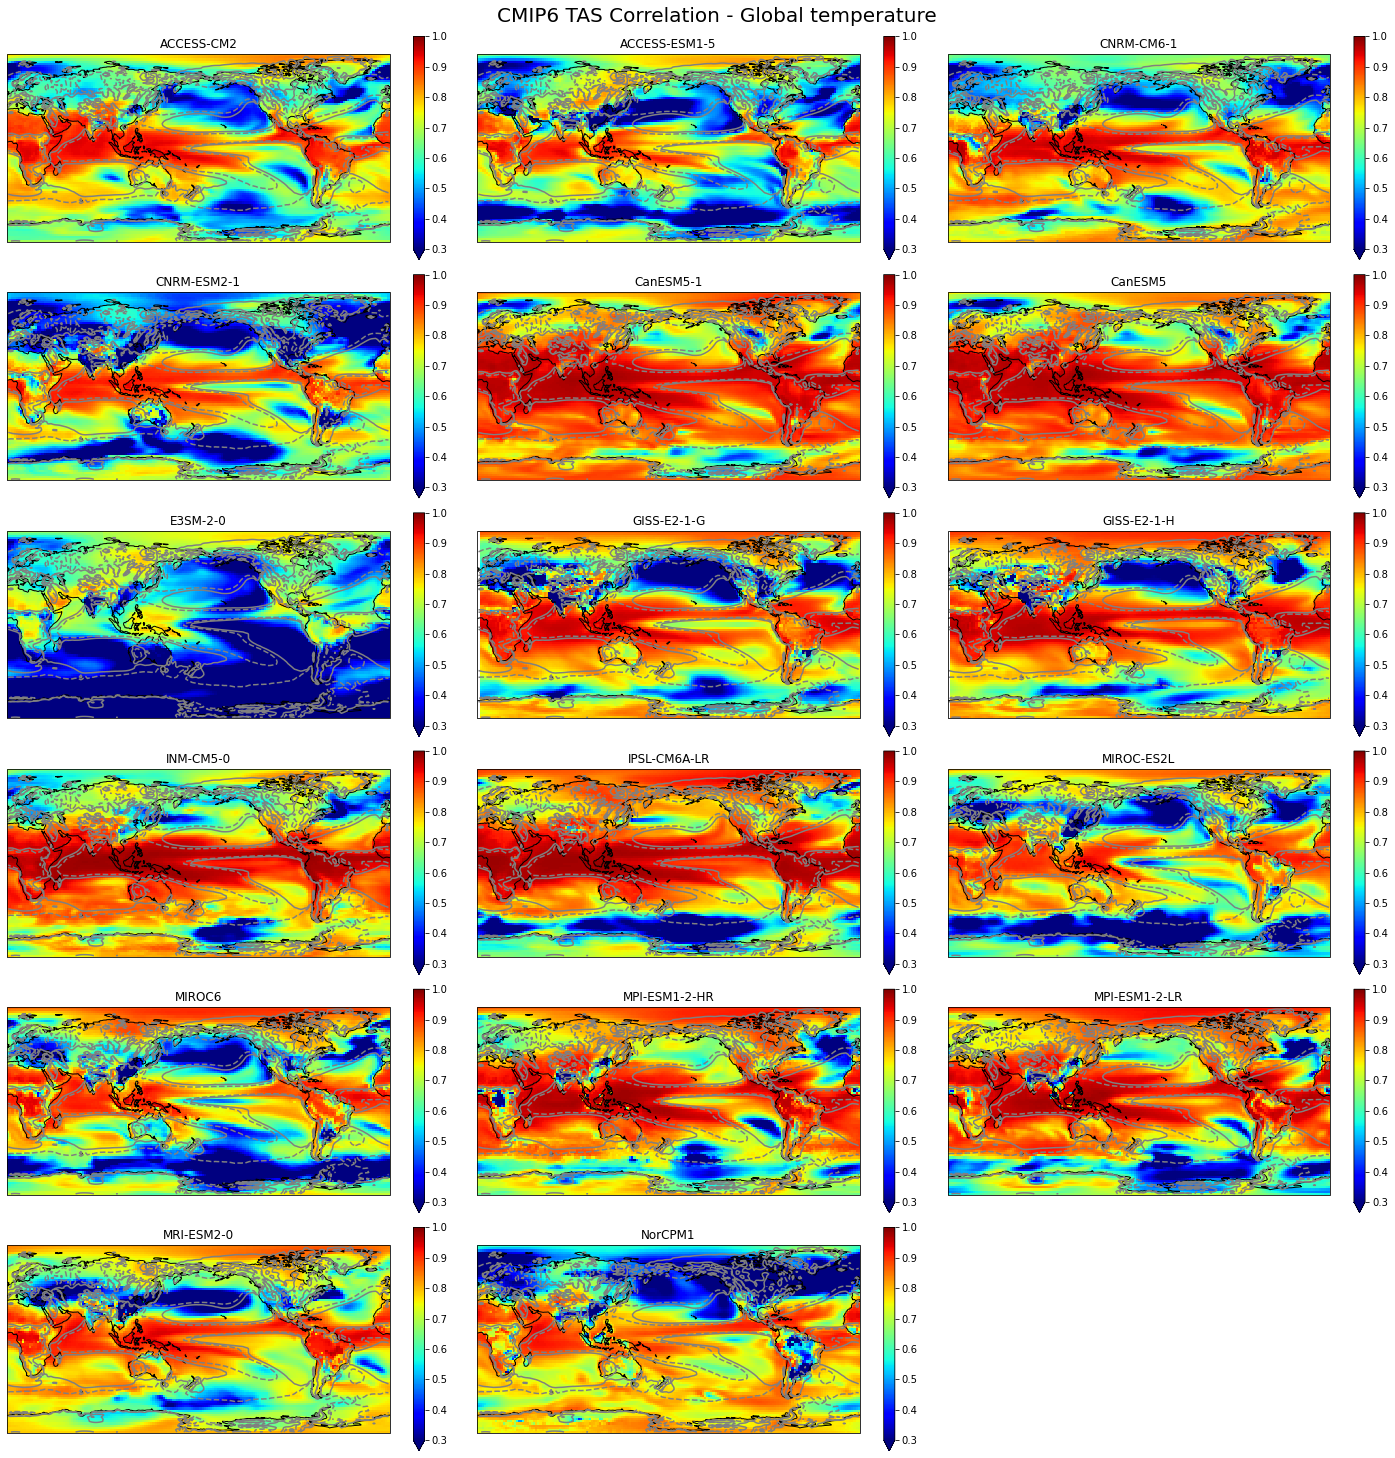

In [35]:
fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.1)

i = 1

for model in cmip6_global_corr_mean['name'].values:
    ax = fig.add_subplot(6,3,i, projection=ccrs.PlateCarree(central_longitude=180))
    cmip6_global_corr_mean.sel(name=model).plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0.3, vmax=1, cmap='jet')
    vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
    ax.coastlines(color='black', linewidth=1)
    plt.title(model)
    i += 1
plt.tight_layout()
plt.suptitle('CMIP6 TAS Correlation - Global temperature', fontsize=20, y=1.01)

Text(0.5, 1.0, 'CMIP6 TAS Correlation - Global temperature (N=17)')

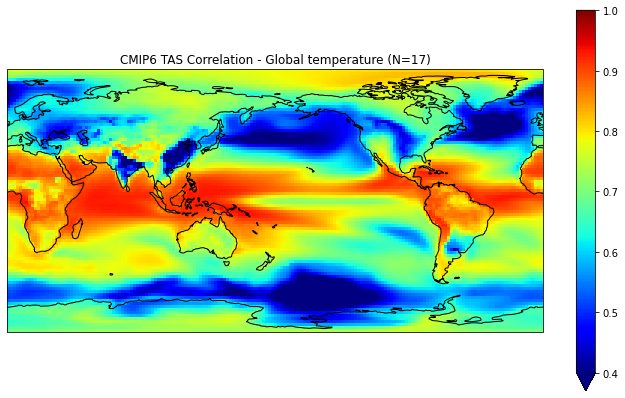

In [36]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cmip6_global_corr_mean.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0.4, vmax=1, cmap='jet')
ax.coastlines(color='black', linewidth=1)
#vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('CMIP6 TAS Correlation - Global temperature (N=17)')

Text(0.5, 1.0, 'CMIP6 TAS Correlation - Global temperature (N=17)')

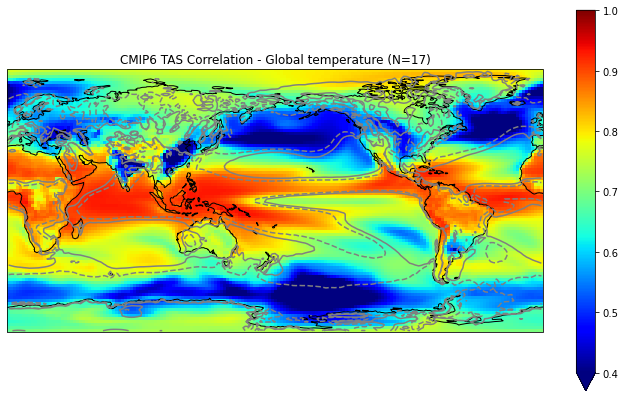

In [37]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cmip6_global_corr_mean.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0.4, vmax=1, cmap='jet')
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('CMIP6 TAS Correlation - Global temperature (N=17)')

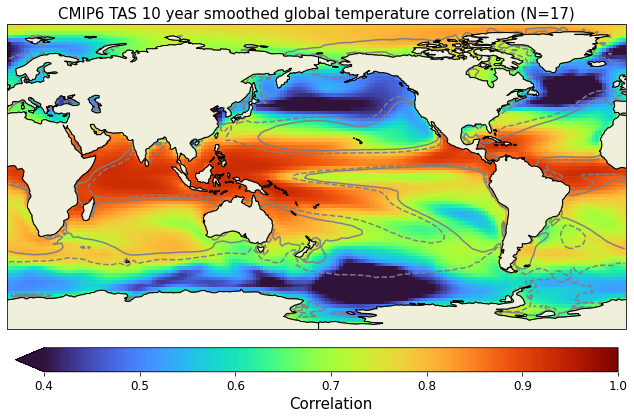

In [63]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
globb = cmip6_global_corr_mean.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0.4, vmax=1, cmap='turbo', 
                                                 add_colorbar=False
                                        #cbar_kwargs={'label': 'Correlation',
                                                #     'orientation': 'horizontal',
                                                #     'shrink': 0.9,
                                                #     'pad': 0.05,
                                                #     'aspect': 25}
                                                )
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax.add_feature(cart.feature.LAND, zorder=10, edgecolor='k')
plt.title('CMIP6 TAS 10 year smoothed global temperature correlation (N=17)', fontsize=15)
                                                 
cb = plt.colorbar(globb, orientation="horizontal", pad=0.05, aspect=25, shrink=0.9, extend='min')
cb.set_label(label='Correlation', fontsize=15)
cb.ax.tick_params(labelsize='large')

### TS

In [7]:
cmip6_ts_global_corr = xr.DataArray(np.zeros((17,10,88,179)), dims=['name','version','lat','lon'])
i = 0
for model in cmip6_ts_smoothed['name']:
    print(model)
    cmip6_ts_global_corr[i,:,:,:] = xr.corr(cmip6_ts_smoothed.sel(name=model), 
                                        cmip6_ts_forced_smoothed.sel(name=model).mean('lat').mean('lon'), dim='time')
    i += 1
cmip6_ts_global_corr

<xarray.DataArray 'name' ()>
array('ACCESS-CM2', dtype='<U10')
Coordinates:
    name     <U10 'ACCESS-CM2'
<xarray.DataArray 'name' ()>
array('ACCESS-ESM1-5', dtype='<U13')
Coordinates:
    name     <U13 'ACCESS-ESM1-5'
<xarray.DataArray 'name' ()>
array('CNRM-CM6-1', dtype='<U10')
Coordinates:
    name     <U10 'CNRM-CM6-1'
<xarray.DataArray 'name' ()>
array('CNRM-ESM2-1', dtype='<U11')
Coordinates:
    name     <U11 'CNRM-ESM2-1'
<xarray.DataArray 'name' ()>
array('CanESM5-1', dtype='<U9')
Coordinates:
    name     <U9 'CanESM5-1'
<xarray.DataArray 'name' ()>
array('CanESM5', dtype='<U7')
Coordinates:
    name     <U7 'CanESM5'
<xarray.DataArray 'name' ()>
array('E3SM-2-0', dtype='<U8')
Coordinates:
    name     <U8 'E3SM-2-0'
<xarray.DataArray 'name' ()>
array('GISS-E2-1-G', dtype='<U11')
Coordinates:
    name     <U11 'GISS-E2-1-G'
<xarray.DataArray 'name' ()>
array('GISS-E2-1-H', dtype='<U11')
Coordinates:
    name     <U11 'GISS-E2-1-H'
<xarray.DataArray 'name' ()>
array('INM-CM5

<xarray.DataArray (name: 17, version: 10, lat: 88, lon: 179)>
array([[[[0.80176175, 0.80352768, 0.80312946, ..., 0.80205748,
          0.80123078, 0.80284219],
         [0.73747482, 0.73530059, 0.73323651, ..., 0.7376856 ,
          0.73780885, 0.73795871],
         [0.71760417, 0.71610721, 0.71080375, ..., 0.73086777,
          0.72998587, 0.7246827 ],
         ...,
         [0.75439628, 0.74928961, 0.74427233, ..., 0.77959387,
          0.76923376, 0.7636526 ],
         [0.7992725 , 0.79740222, 0.79548274, ..., 0.80344062,
          0.80202096, 0.80123558],
         [0.80671995, 0.80593438, 0.80571103, ..., 0.81092082,
          0.80981917, 0.80845974]],

        [[0.74712794, 0.74758212, 0.74601769, ..., 0.75463357,
          0.75363971, 0.75263044],
         [0.70441477, 0.7023875 , 0.70019875, ..., 0.70102143,
          0.70085316, 0.70310346],
         [0.72680904, 0.72866618, 0.72850929, ..., 0.72803519,
          0.72739467, 0.72655871],
...
         [0.60102711, 0.58358614, 0.57023057, ..., 0.68445874,
          0.66076265, 0.63952874],
         [0.6833707 , 0.67586299, 0.66871124, ..., 0.71885483,
          0.710142  , 0.69998164],
         [0.71322241, 0.71037674, 0.70797351, ..., 0.72761524,
          0.72391641, 0.72025985]],

        [[0.86665029, 0.85366337, 0.85757789, ..., 0.86970077,
          0.85645895, 0.83867369],
         [0.81783478, 0.83085452, 0.83092088, ..., 0.80972566,
          0.80097074, 0.79189412],
         [0.75153936, 0.7768034 , 0.78498783, ..., 0.72697162,
          0.75952145, 0.72673477],
         ...,
         [0.55175794, 0.51846124, 0.49190848, ..., 0.67808418,
          0.64768391, 0.61848454],
         [0.62671044, 0.61261738, 0.59935191, ..., 0.68406706,
          0.67117375, 0.65592359],
         [0.65934643, 0.65329482, 0.64857351, ..., 0.68204814,
          0.67657232, 0.67133574]]]])
Dimensions without coordinates: name, version, lat, lon

In [8]:
cmip6_ts_global_corr_mean = cmip6_ts_global_corr.mean('version')
cmip6_ts_global_corr_mean

<xarray.DataArray (name: 17, lat: 88, lon: 179)>
array([[[0.68805724, 0.68655479, 0.68419221, ..., 0.69565927,
         0.69331542, 0.6917887 ],
        [0.63036611, 0.62817889, 0.62569927, ..., 0.63427028,
         0.63310368, 0.63214442],
        [0.62380833, 0.62288776, 0.62106955, ..., 0.63170121,
         0.62949573, 0.62660655],
        ...,
        [0.69620889, 0.6845627 , 0.67304394, ..., 0.74243281,
         0.73031111, 0.71945263],
        [0.74672323, 0.74121249, 0.73590283, ..., 0.77257404,
         0.76585544, 0.75915141],
        [0.76866946, 0.76632502, 0.76396676, ..., 0.77990301,
         0.77666088, 0.7743001 ]],

       [[0.71407209, 0.71569275, 0.71715672, ..., 0.70827357,
         0.70960087, 0.71093275],
        [0.69817197, 0.69930874, 0.70056483, ..., 0.69345728,
         0.69484055, 0.69585767],
        [0.65790465, 0.66040106, 0.66317524, ..., 0.65096409,
         0.65208728, 0.6538685 ],
...
        [0.83040517, 0.82732689, 0.82434677, ..., 0.84519601,
         0.84120157, 0.8375917 ],
        [0.83982949, 0.83780373, 0.83560999, ..., 0.84911226,
         0.84657855, 0.84426232],
        [0.84418058, 0.84282723, 0.84178001, ..., 0.8493298 ,
         0.84792193, 0.84673874]],

       [[0.74711451, 0.73094402, 0.74218827, ..., 0.7533421 ,
         0.750766  , 0.74240852],
        [0.73218701, 0.72201688, 0.70808475, ..., 0.74104432,
         0.7351128 , 0.72227518],
        [0.70870939, 0.69694408, 0.6762635 , ..., 0.73634516,
         0.72417368, 0.71606472],
        ...,
        [0.48613283, 0.46804458, 0.45426218, ..., 0.56783658,
         0.54579607, 0.52559304],
        [0.56300664, 0.55554442, 0.54855494, ..., 0.59821287,
         0.5895147 , 0.57963353],
        [0.58997995, 0.58718038, 0.58478674, ..., 0.60246884,
         0.59926742, 0.59622477]]])
Dimensions without coordinates: name, lat, lon

In [9]:
cmip6_ts_global_corr_mean.coords['name'] = cmip6_ts_smoothed['name'].values
cmip6_ts_global_corr_mean.coords['lat'] = cmip6_ts_smoothed['lat'].values
cmip6_ts_global_corr_mean.coords['lon'] = cmip6_ts_smoothed['lon'].values
cmip6_ts_global_corr_mean

<xarray.DataArray (name: 17, lat: 88, lon: 179)>
array([[[0.68805724, 0.68655479, 0.68419221, ..., 0.69565927,
         0.69331542, 0.6917887 ],
        [0.63036611, 0.62817889, 0.62569927, ..., 0.63427028,
         0.63310368, 0.63214442],
        [0.62380833, 0.62288776, 0.62106955, ..., 0.63170121,
         0.62949573, 0.62660655],
        ...,
        [0.69620889, 0.6845627 , 0.67304394, ..., 0.74243281,
         0.73031111, 0.71945263],
        [0.74672323, 0.74121249, 0.73590283, ..., 0.77257404,
         0.76585544, 0.75915141],
        [0.76866946, 0.76632502, 0.76396676, ..., 0.77990301,
         0.77666088, 0.7743001 ]],

       [[0.71407209, 0.71569275, 0.71715672, ..., 0.70827357,
         0.70960087, 0.71093275],
        [0.69817197, 0.69930874, 0.70056483, ..., 0.69345728,
         0.69484055, 0.69585767],
        [0.65790465, 0.66040106, 0.66317524, ..., 0.65096409,
         0.65208728, 0.6538685 ],
...
        [0.83040517, 0.82732689, 0.82434677, ..., 0.84519601,
         0.84120157, 0.8375917 ],
        [0.83982949, 0.83780373, 0.83560999, ..., 0.84911226,
         0.84657855, 0.84426232],
        [0.84418058, 0.84282723, 0.84178001, ..., 0.8493298 ,
         0.84792193, 0.84673874]],

       [[0.74711451, 0.73094402, 0.74218827, ..., 0.7533421 ,
         0.750766  , 0.74240852],
        [0.73218701, 0.72201688, 0.70808475, ..., 0.74104432,
         0.7351128 , 0.72227518],
        [0.70870939, 0.69694408, 0.6762635 , ..., 0.73634516,
         0.72417368, 0.71606472],
        ...,
        [0.48613283, 0.46804458, 0.45426218, ..., 0.56783658,
         0.54579607, 0.52559304],
        [0.56300664, 0.55554442, 0.54855494, ..., 0.59821287,
         0.5895147 , 0.57963353],
        [0.58997995, 0.58718038, 0.58478674, ..., 0.60246884,
         0.59926742, 0.59622477]]])
Coordinates:
  * name     (name) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'NorCPM1'
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

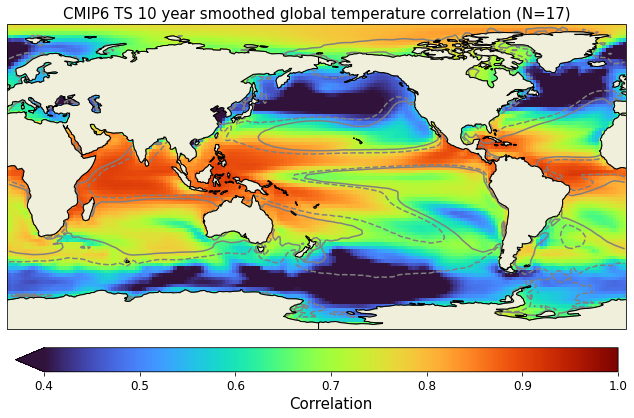

In [10]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
globb = cmip6_ts_global_corr_mean.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0.4, vmax=1, cmap='turbo', 
                                                 add_colorbar=False
                                        #cbar_kwargs={'label': 'Correlation',
                                                #     'orientation': 'horizontal',
                                                #     'shrink': 0.9,
                                                #     'pad': 0.05,
                                                #     'aspect': 25}
                                                )
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax.add_feature(cart.feature.LAND, zorder=10, edgecolor='k')
plt.title('CMIP6 TS 10 year smoothed global temperature correlation (N=17)', fontsize=15)
                                                 
cb = plt.colorbar(globb, orientation="horizontal", pad=0.05, aspect=25, shrink=0.9, extend='min')
cb.set_label(label='Correlation', fontsize=15)
cb.ax.tick_params(labelsize='large')